# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile sum.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Overwriting sum.cpp


In [ ]:
!g++ sum.cpp -o sum
!./sum

5 8
13

### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Overwriting input1.txt


In [ ]:
%%writefile output1.txt
12

Overwriting output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Overwriting input2.txt


In [ ]:
%%writefile output2.txt
4

Overwriting output2.txt


In [ ]:
!./sum < input1.txt

12

In [ ]:
!./sum < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./sum < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./sum < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3


def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Overwriting sum.py


In [ ]:
!python sum.py

6 9
15


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product1.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Overwriting max_pairwise_product1.cpp


In [ ]:
!g++ max_pairwise_product1.cpp -o max_pairwise_product1
!./max_pairwise_product1

5
4 8 4 3 2
32


### Test 1: lagest input numbers 20000 20000 in the input

In [ ]:
%%writefile input1.txt
10
1 3 100000 9 100000 23

Overwriting input1.txt


In [ ]:
!./max_pairwise_product1 < input1.txt

1410065408


In [ ]:
%%writefile max_pairwise_product2.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Overwriting max_pairwise_product2.cpp


In [ ]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < input1.txt

10000000000


### Test 2  generate a tests file with the maximun n = 200000 numbers and measure time

Lo que vamos a hacer es con unfor generar un arichivo llamado Test2.txt que contiene 200000 numeros generados aleatoreamente y con el comando magico %%time vemos cuanto dura este algortimo en dar respuesta.

In [ ]:
import random
for i in range(random.randint(2,200000)):
  with open('/content/Test2.txt', 'a') as writefile:
    writefile.write(str(random.randint(0,200000))+" ")

In [ ]:
%%time
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < Test2.txt

39996400080
CPU times: user 54.2 ms, sys: 18.5 ms, total: 72.7 ms
Wall time: 15.5 s


In [ ]:
%%writefile outputMpp.txt
39996400080

Overwriting outputMpp.txt


como podemos observar nos da el resultad y nos dice que el tiempo de ejecucion es de 15.4s

### Efficient solution 

Ahora creamos la funcion mas rapida llamada `MaxPairwiseProductFast`.

In [ ]:
%%writefile max_pairwise_product3.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

long long MaxPairwiseProductFast(const std::vector<int>& numbers) {
    int n = numbers.size();
    int max_index1 = -1;

    for(int i = 0; i < n; ++i){
        if((max_index1 == -1) || (numbers[i]>numbers[max_index1])){
            max_index1 = i;
        }
    }

    int max_index2 = -1;
    for(int j = 0; j<n;++j){
        if((j != max_index1) && ((max_index2 == -1) || (numbers[j]>numbers[max_index2]))){
            max_index2 = j;
        }
    }

    return ((long long) (numbers[max_index1])*numbers[max_index2]);
}

int main() {
    int n;
    //std::cout <<"ingrese n"<< std::endl;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        //std::cout <<"ingrese numbers"<< i << std::endl;
        std::cin >> numbers[i];
    }

    long long result = MaxPairwiseProductFast(numbers);
    std::cout <<result<< "\n";
    return 0;

}


Overwriting max_pairwise_product3.cpp


Aqui le pasamos el Test2.txt y vemos el resultado.

In [ ]:
%%time
!g++ max_pairwise_product3.cpp -o max_pairwise_product3
!./max_pairwise_product3 < Test2.txt

39996400080
CPU times: user 7.81 ms, sys: 13.5 ms, total: 21.3 ms
Wall time: 638 ms


Como se observa el resultado es exactamente el mismo pero el tiempo de ejecucion es de 638 ms.

In [ ]:
%%writefile outputMppFast.txt
39996400080

Overwriting outputMppFast.txt


Ahora vamos a comparar los archivos con el Grep

In [ ]:
!grep -xvFf outputMpp.txt outputMppFast.txt 

Stress tests 

Para la prueba de estre los que se va a hacer es un ciclo while que genere un arreglo de numeros aleatoreos, luego pase el arreglo a ambas funciones `MaxPairwiseProduct` y `MaxPairwiseProductFast` y se compara, si son iguales se continua con la ejecucion pero si en algun momento son diferentes se acaba el ciclo y muestra un respuesta equivocada.

In [1]:
%%writefile max_pairwise_product4.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <stdlib.h>
long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0;
    long long temp = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            temp = (long long) numbers[first] * numbers[second];
            if(temp>max_product) max_product=temp;
        }
    }

    return max_product;
}
long long MaxPairwiseProductFast(const std::vector<int>& numbers) {
    int n = numbers.size();
    int max_index1 = -1;

    for(int i = 0; i < n; ++i){
        if((max_index1 == -1) || (numbers[i]>numbers[max_index1])){
            max_index1 = i;
        }
    }

    int max_index2 = -1;
    for(int j = 0; j<n;++j){
        if((j != max_index1) && ((max_index2 == -1) || (numbers[j]>numbers[max_index2]))){
            max_index2 = j;
        }
    }

    return ((long long) (numbers[max_index1])*numbers[max_index2]);
}

int main() {
    
//    while(true){
	for(int i = 0 ; i < 100; i++){
      int n = rand() % 10 + 2;
      std::cout<< n << '\n';
      std::vector<int> numbers(n);
      for (int i = 0; i < n; ++i) {
          numbers[i] = (rand() % 200000);
      }
      for (int i = 0; i < n; ++i) {
          std::cout<< numbers[i]<<' ';
      }
      std::cout<< '\n';

      long long res1 = MaxPairwiseProduct(numbers);
      long long res2 = MaxPairwiseProductFast(numbers);

      if(res1 != res2){
        std::cout<< "respuesta equivocada " << res1 << ' ' <<res2 ;
        break;
      }else{
        std::cout<< "OK\n";
      }
    }
    return 0;
}

Writing max_pairwise_product4.cpp


In [2]:
!g++ max_pairwise_product4.cpp -o max_pairwise_product4
!./max_pairwise_product4

5
130886 92777 36915 147793 38335 
OK
8
160492 116649 41421 2362 90027 168690 120059 97763 
OK
8
180540 183426 89172 55736 5211 195368 102567 156429 
OK
4
21530 122862 65123 174067 
OK
7
113929 179802 34022 123058 133069 98167 161393 
OK
8
175011 78042 176229 177373 84421 144919 13784 98537 
OK
10
194324 198315 64370 166413 3526 176091 68980 159956 41873 6862 
OK
2
106996 97281 
OK
7
20925 77084 136327 60336 126505 150846 21729 
OK
5
125857 16124 153895 19582 100545 
OK
6
33367 115434 190364 144043 113750 171087 
OK
10
117276 147178 95788 193584 105403 102651 192754 12399 199932 95060 
OK
8
193368 147739 10012 36226 98586 148094 97539 140795 
OK
2
51434 160378 
OK
9
66601 110097 12902 173317 170492 126652 60756 197301 160280 
OK
8
9441 153865 29689 28444 146619 158440 144729 158031 
OK
9
138097 105771 34481 90675 120709 98927 104567 177856 179497 
OK
5
54586 76965 55306 164683 6219 
OK
6
51528 132871 5732 48829 9503 130019 
OK
2
163368 159708 
OK
7
26340 118149 147796 100723 142618 224

Como vemos con 10000 iteraciones funciona, vamos a probar con 100000.

In [ ]:
%%time
!g++ max_pairwise_product4.cpp -o max_pairwise_product4
!./max_pairwise_product4

Streaming output truncated to the last 5000 lines.
6
181985 33189 96890 81554 173450 94173 
OK
10
21634 193647 177806 122100 34286 7881 108052 2838 89981 174318 
OK
6
198846 177826 106060 20461 165649 171724 
OK
2
191567 42179 
OK
9
116650 58730 119663 98636 8271 16553 96542 181721 27079 
OK
3
3355 20726 87359 
OK
10
171365 95240 149860 174203 185222 40530 75780 100420 18357 181840 
OK
3
100358 69917 64723 
OK
10
112096 192430 124928 170826 112093 139916 95450 44999 36459 77171 
OK
10
146012 196879 92804 33371 155039 180521 44963 21251 154725 146537 
OK
4
146857 46957 196491 128697 
OK
2
96849 114966 
OK
5
105127 27062 57695 30056 114241 
OK
3
169972 9691 131140 
OK
5
3214 119570 185147 93 128726 
OK
2
71484 109248 
OK
6
92736 180325 42723 154518 127182 89681 
OK
11
172231 90223 164210 87198 39137 185690 30612 13184 15746 61205 99325 
OK
2
187248 30465 
OK
8
190463 66387 42705 106908 195114 177576 178393 104362 
OK
4
187481 84687 116485 141999 
OK
3
122518 9360 100452 
OK
6
89922 10400

## Python

In [ ]:
# python3
def mpp(numbers):
    n = len(numbers)
    maximum = 0
    for i in range(n):
        for j in range(i + 1, n):
            maximum = max(maximum, numbers[i] * numbers[j])
    return maximum

def mpp_fast(n, numbers):
    max_i1 = -1
    for i in range(n):
        if (max_i1 == -1 or numbers[i] > numbers[max_i1]):
            max_i1 = i

    max_i2 = -1
    for i in range(n):
        if (i != max_i1 and (max_i2 == -1 or numbers[i] > numbers[max_i2])):
            max_i2 = i

    return numbers[max_i1] * numbers[max_i2]

if __name__ == '__main__':
    input_n = int(input())
    list_numbers = [int(x) for x in input().split()]
    assert (len(list_numbers) == input_n)
    print(mpp_fast(input_n, list_numbers))

5
6 8 5 23 7
184


#screenshots de envios de coursera


##suma de dos digitos

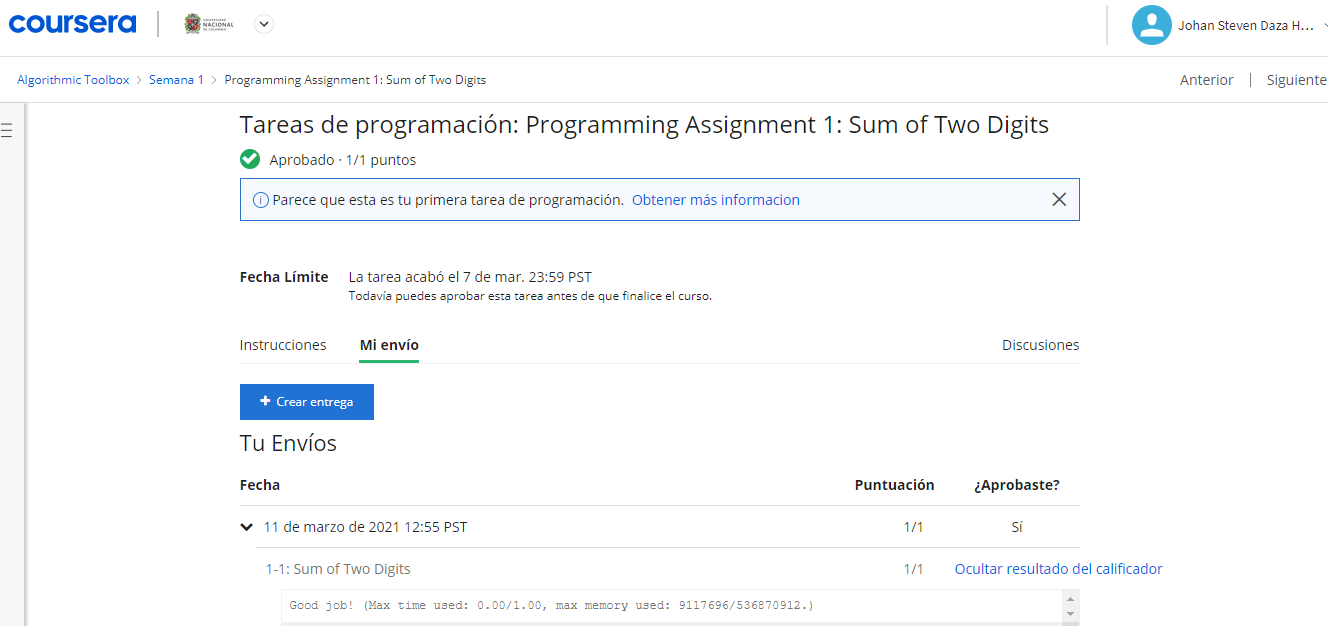

##Maximum Pairwise Product

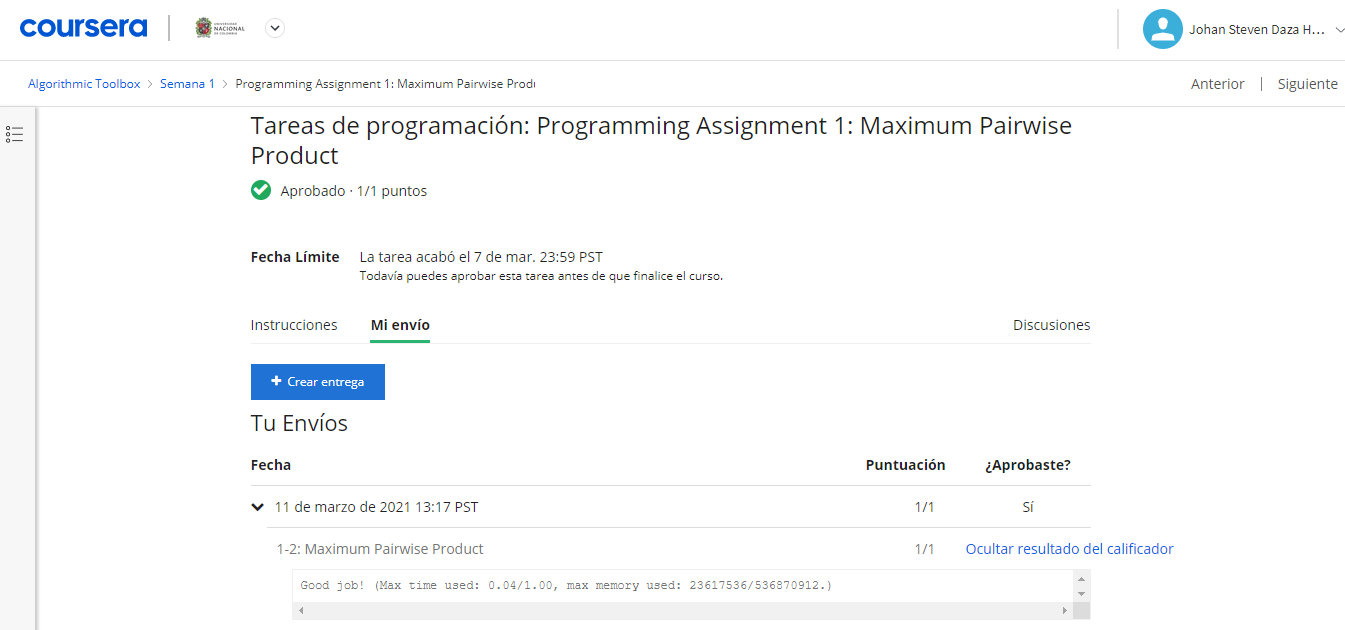